In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (c:\Users\47476\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [30]:
# Hente inn datasettet
combined_df = pd.read_csv('combined.csv')

In [31]:
# Sjekker om er riktig
combined_df.drop('Unnamed: 0', axis=1, inplace=True)
combined_df.drop('dnr_status', axis=1, inplace=True)
combined_df.drop('dnr_dag', axis=1, inplace=True)
combined_df.drop('adl_pasient', axis=1, inplace=True)
combined_df.head()

pasient_id     alder   kjønn  utdanning     inntekt etnisitet  sykehusdød  \
0           2  60.33899  female       12.0    $11-$25k     white           1   
1           3  52.74698  female       12.0  under $11k     white           0   
2           4  42.38498  female       11.0  under $11k     white           0   
3           6  93.01599    male       14.0         NaN     white           1   
4           7  62.37097    male       14.0    $25-$50k     white           0   

   oppholdslengde  blodtrykk  hvite_blodlegemer  ...  adl_stedfortreder  \
0             4.0       43.0          17.097656  ...                1.0   
1            17.0       70.0           8.500000  ...                0.0   
2             3.0       75.0           9.099609  ...                0.0   
3             4.0      110.0          10.398438  ...                1.0   
4             9.0       78.0          11.699219  ...                1.0   

   fysiologisk_score  apache_fysiologisk_score  overlevelsesestimat_2mnd  \
0          52.695312                      74.0                  0.001000   
1          20.500000                      45.0                  0.790894   
2          20.097656                      19.0                  0.698975   
3          19.398438                      27.0                  0.284973   
4          17.296875                      46.0                  0.892944   

   overlevelsesestimat_6mnd  diabetes  demens       kreft  \
0                  0.000000         0       0          no   
1                  0.664917         0       0          no   
2                  0.411987         0       0  metastatic   
3                  0.214996         0       0          no   
4                  0.820923         0       0          no   

   lege_overlevelsesestimat_2mnd  lege_overlevelsesestimat_6mnd  
0                           0.00                            0.0  
1                           0.75                            0.5  
2                           0.90                            0.5  
3                           0.00                            0.0  
4                            NaN                            0.7  

[5 rows x 39 columns]

# Data preprocess

In [32]:
# Preprocess the data
X = combined_df.drop(['pasient_id', 'oppholdslengde'], axis=1)
y = combined_df['oppholdslengde']

# Lage forskjellige strategier

In [ ]:
def velg_strategy(X, y, strategy):
    if strategy == 'drop_nan':
        X_strategy = X.dropna()
        y_strategy = y[X_strategy.index]
    elif strategy == 'drop_cols':
        nan_counts = X.isnull().sum()
        threshold = 0
        X_strategy = X.drop(columns=nan_counts[nan_counts > threshold].index)
        X_strategy = X_strategy.fillna(0)
        y_strategy = y
    elif strategy == 'fill_median':
        X_fill_median = X.copy()
        median_cols = X_fill_median.select_dtypes(include=['int64', 'float64']).columns
        X_fill_median[median_cols] = X_fill_median[median_cols].fillna(X_fill_median[median_cols].median())
        X_strategy = X_fill_median
        y_strategy = y
    else:  # 'fill_zero'
        X_strategy = X.fillna(0)
        y_strategy = y
    
    return X_strategy, y_strategy


#  Model laging og evaluering

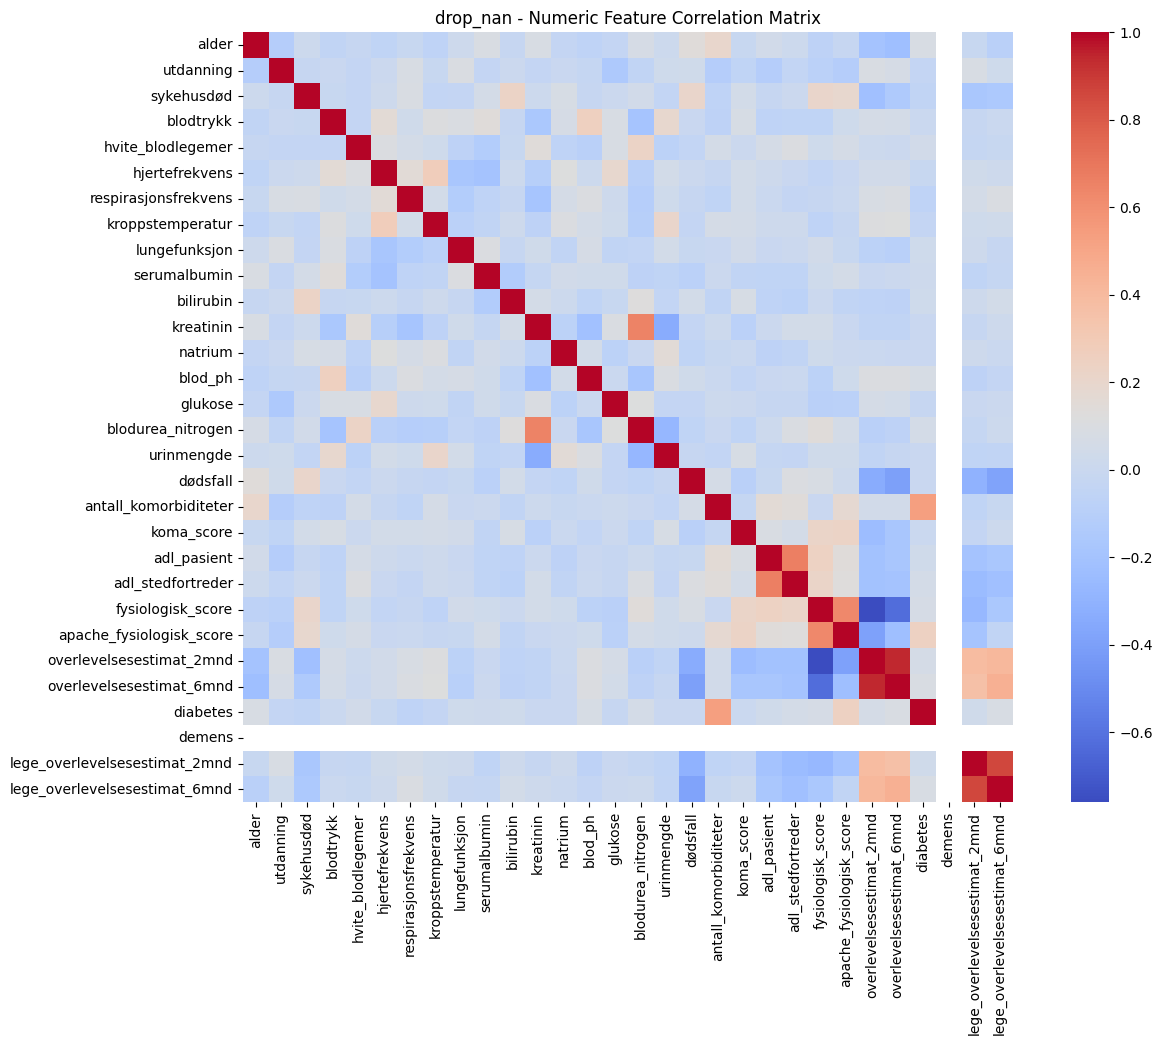

Random Forest: 9.853936838244968
Gradient Boosting: 9.903347741940646
Decision Tree: 12.877040879727835
Linear Regression: 10.036496820252154
Polynomial Regression: 11.7232483931102
Ridge Regression: 9.854112377193994
drop_nan - Best Model: Random Forest
drop_nan - Validation RMSE: 9.85


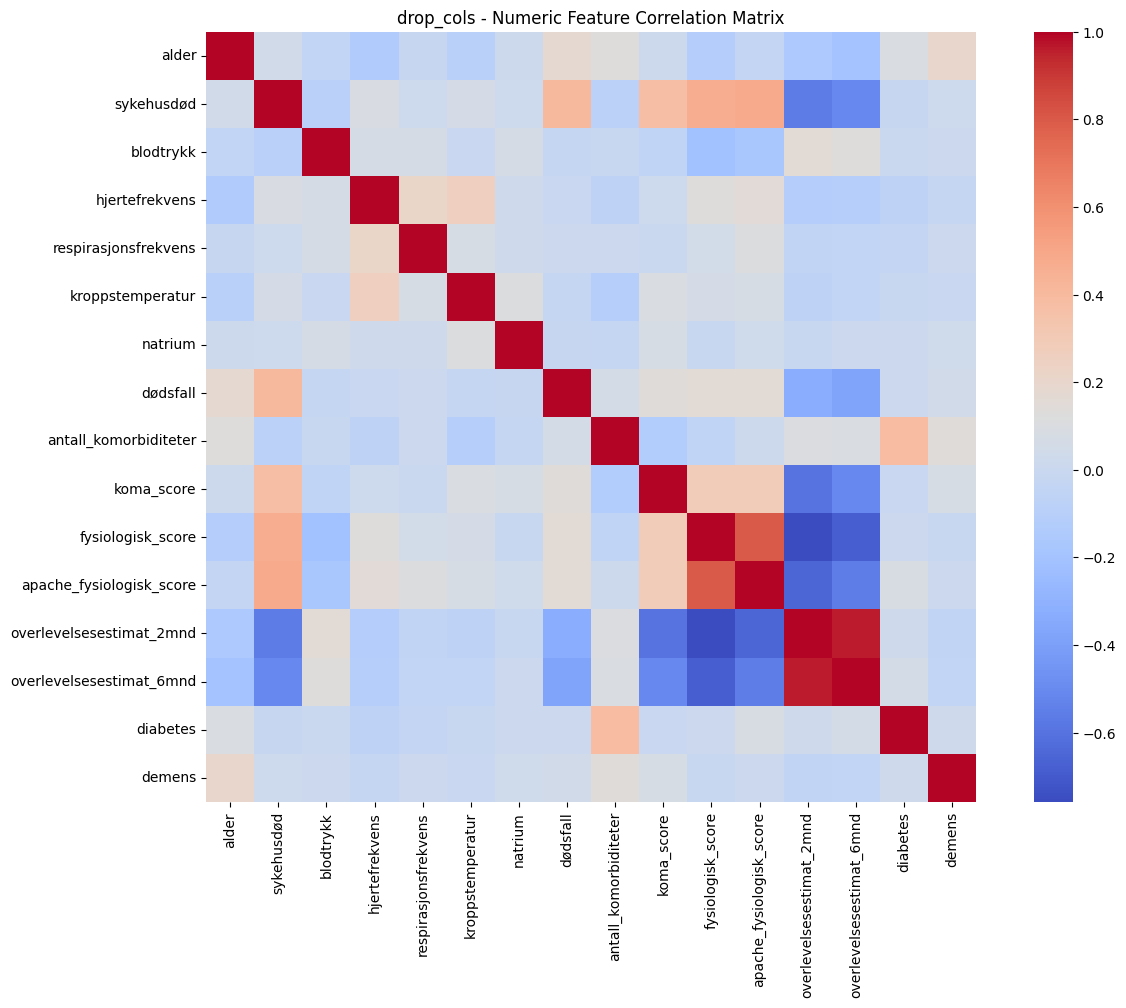

Random Forest: 23.347446713646693
Gradient Boosting: 23.11858712795693
Decision Tree: 30.45485280720314
Linear Regression: 23.42199974169499
Polynomial Regression: 46565848.01321979
Ridge Regression: 23.421100966454524
drop_cols - Best Model: Gradient Boosting
drop_cols - Validation RMSE: 23.12


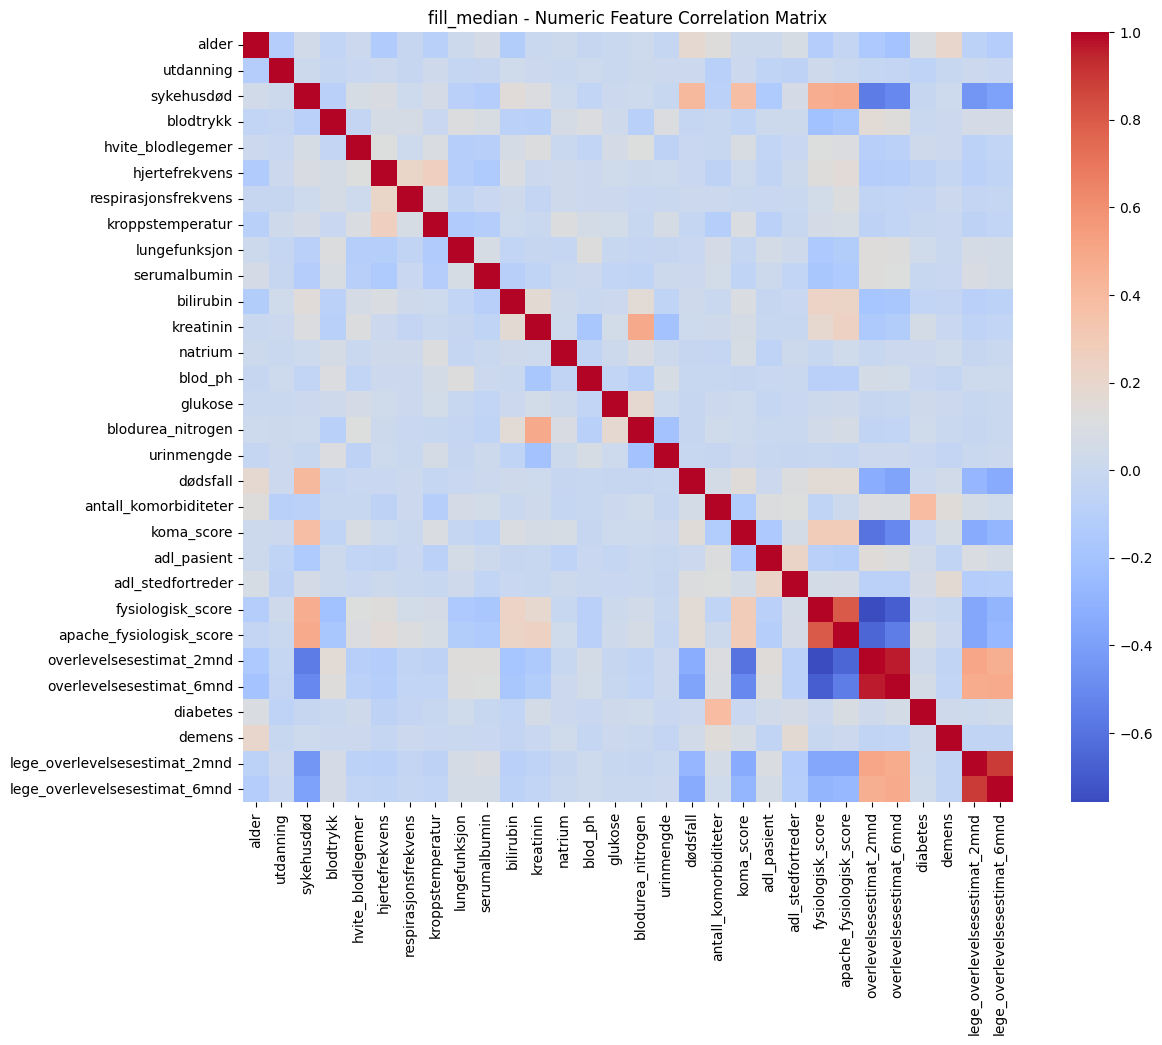

Random Forest: 23.244142360496596
Gradient Boosting: 23.120151610754906
Decision Tree: 28.620809064622605
Linear Regression: 23.42309242948602
Polynomial Regression: 30348113813.044415
Ridge Regression: 23.421817336986955
fill_median - Best Model: Gradient Boosting
fill_median - Validation RMSE: 23.12


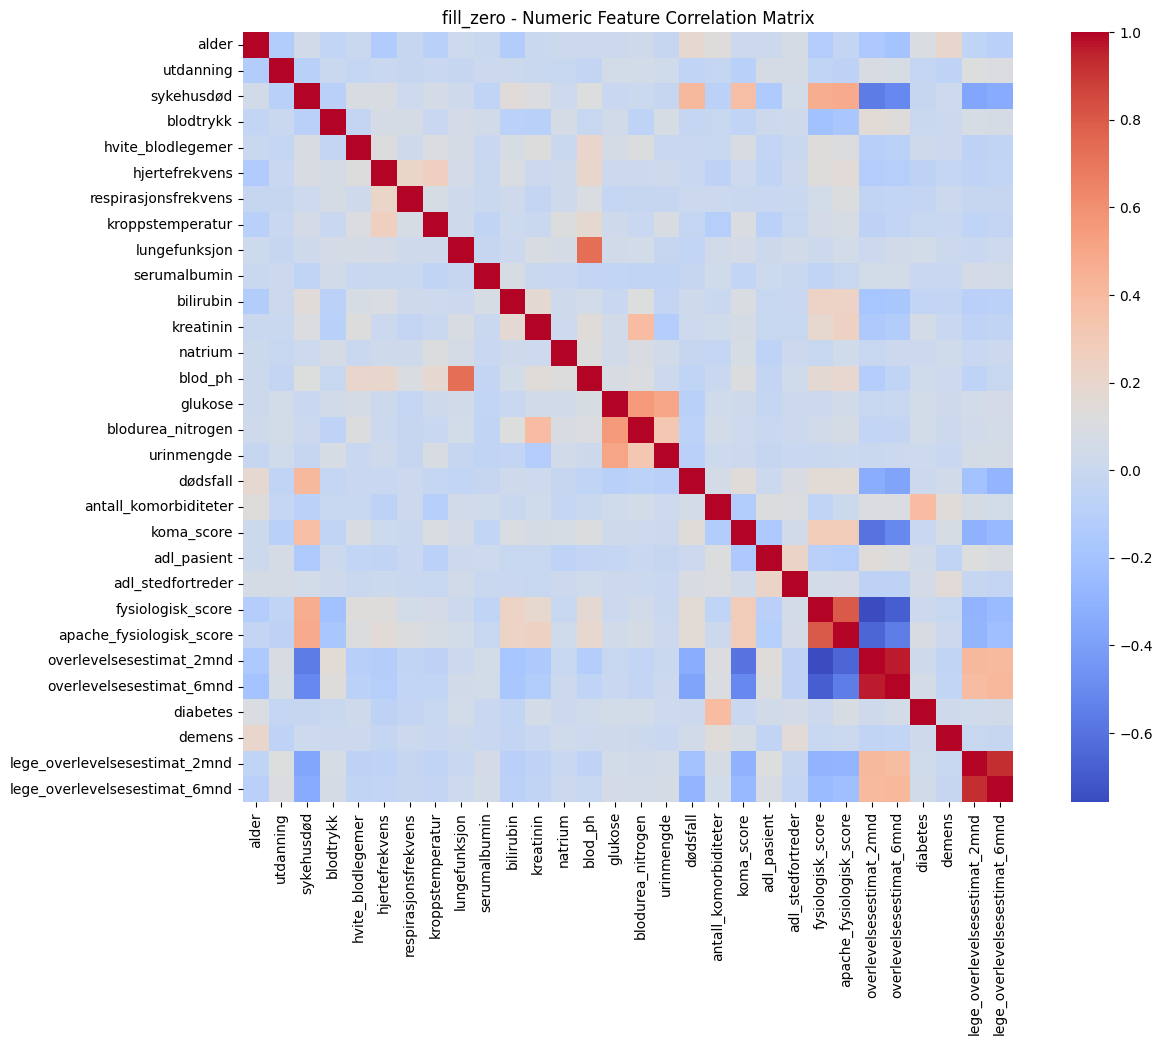

Random Forest: 23.046882300314586
Gradient Boosting: 23.1372549947639
Decision Tree: 28.796134029730705
Linear Regression: 23.4321958979064
Polynomial Regression: 108127013590.1507
Ridge Regression: 23.430841348115866
fill_zero - Best Model: Random Forest
fill_zero - Validation RMSE: 23.05


In [33]:
# Lage 6 forskjellige modeller
strategies = ['drop_nan', 'drop_cols', 'fill_median', 'fill_zero']
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Linear Regression', 'Polynomial Regression', 'Ridge Regression',]
model_pipelines = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=24),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=24),
    'Decision Tree': DecisionTreeRegressor(random_state=24),
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Store de beste modellene
best_models = {}
validation_rmse = {}

# Lage de 4 forskjellige strategier for å håndtere Nan
for strategy in strategies:
    X_strategy, y_strategy = velg_strategy(X, y, strategy)

    # Split the train (60%), validation (20%), and test (20%)
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_strategy, y_strategy, test_size=0.2, random_state=24)
    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=24)  # 0.25 * 0.8 = 0.2

    # Correlation matrix
    numeric_cols = X_strategy.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = X_strategy[numeric_cols].corr()
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, ax=ax)
    plt.title(f'{strategy} - Correlation Matrix')
    plt.show()

    categorical_cols = X_strategy.select_dtypes(exclude=['int64', 'float64']).columns
    numerical_cols = [col for col in X_strategy.columns if col not in categorical_cols]

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('converter', FunctionTransformer(lambda x: x.astype(str))),  # Convert to strings
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Split te train (60%), validation (20%), and test (20%)
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_strategy, y_strategy, test_size=0.2, random_state=24)
    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=24)  # 0.25 * 0.8 = 0.2

    best_rmse = float('inf')
    best_model_name = None
    best_model_pipeline = None

    for model_name in models:
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model_pipelines[model_name])
        ])

        model_pipeline.fit(X_train, y_train)
        y_val_pred = model_pipeline.predict(X_val)
        rmse_val = root_mean_squared_error(y_val, y_val_pred)
        print(f'{model_name}: {rmse_val}')
        if rmse_val < best_rmse:
            best_rmse = rmse_val
            best_model_name = model_name
            best_model_pipeline = model_pipeline

    best_models[strategy] = best_model_pipeline
    validation_rmse[strategy] = best_rmse

    print(f'{strategy} - Best Model: {best_model_name}')
    print(f'{strategy} - Validation RMSE: {best_rmse:.2f}')

# Sammenligne med full dataset

In [34]:
# Compare med det originale datasettet (Combined_df) med de beste modellene og strategiene
for strategy in strategies:
    best_model_pipeline = best_models[strategy]

    # Apply den strategy brukt during training to the full dataset
    X_strategy, y_strategy = velg_strategy(X, y, strategy)

    # Split the transformed dataset into train, validation, and test sets
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_strategy, y_strategy, test_size=0.2, random_state=24)
    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=24)  # 0.25 * 0.8 = 0.2

    y_val_pred = best_model_pipeline.predict(X_val)
    
    # RMSE
    rmse_val = root_mean_squared_error(y_val, y_val_pred)
    print(f'{strategy} - Validation RMSE på full dataset (Combined_df): {rmse_val:.2f}')


drop_nan - Test RMSE on full dataset (Combined_df): 20.54
drop_cols - Test RMSE on full dataset (Combined_df): 20.52
fill_median - Test RMSE on full dataset (Combined_df): 20.34
fill_zero - Test RMSE on full dataset (Combined_df): 20.54


In [35]:
# Finne % av data med differanse mindre enn 10
for strategy in strategies:
    best_model_pipeline = best_models[strategy]
    best_model_pipeline.fit(X_train, y_train)
    y_test_pred = best_model_pipeline.predict(X_test)

    X_test_filled = X_test.copy()
    X_test_filled['predicted_value'] = y_test_pred
    diffs = (X_test_filled['predicted_value']) - y_test
    diff_counts = {}
    for diff in diffs:
        diff = round(diff)  # Round til heltall
        if diff in diff_counts:
            diff_counts[diff] += 1
        else:
            diff_counts[diff] = 1

    total_less_than_10 = sum(count for diff, count in diff_counts.items() if abs(diff) < 10)
    total_diffs = len(diffs)
    percentage_less_than_10 = (total_less_than_10 / total_diffs) * 100

    print(f'{strategy} - Prosent av data med forskjell mindre enn 10 på full dataset (Comibined_df): {percentage_less_than_10:.2f}%')

drop_nan - Percentage of data with difference less than 10 on full dataset (Comibined_df): 62.10%
drop_cols - Percentage of data with difference less than 10 on full dataset (Comibined_df): 62.68%
fill_median - Percentage of data with difference less than 10 on full dataset (Comibined_df): 63.58%
fill_zero - Percentage of data with difference less than 10 on full dataset (Comibined_df): 62.10%
